# Support Vector Machines

### Based on

- [Wikipedia SVM](https://en.wikipedia.org/wiki/Support-vector_machine)
- [Andrew NG lecture notes: Kernel Methods](http://cs229.stanford.edu/summer2020/cs229-notes3.pdf#page=1)
- [Information Science and Statistics (Bishop)](https://docs.google.com/viewer?a=v&pid=sites&srcid=aWFtYW5kaS5ldXxpc2N8Z3g6MjViZDk1NGI1NjQzOWZiYQ)


## 1. Preliminaries
Any hyperplane is defined by a tuple $(\vec{w}, b)$ using the following formula:

$$
\vec{w}\cdot \vec{x} = b
$$

You can view this equation as all the vectors that have the same projection w.r.t $\vec{w}$. Note also that there is a redundancy: multiplying both sides by a constant, change $\vec{w}$ and $b$, but still define the same plane. Therefore there is an equivalence relation that defines uniquely a plane $\implies (\vec{w},b)/\sim$, where $(\vec{w},b) \sim (\vec{w}',b')$ iff $\vec{w}' = \frac{b'}{b}\vec{w}$. Therefore without loss of generality we can define a plane by convention as the pair $(\vec{w}, b=1)$. Or if we want that $\vec{w} \in $ Plane $\implies b = || \vec{w}||^2$. All this is equivalent to Gauge theory and fixing the $b$ is equivalent to fixing the gauge.

### 1.1 Distance between parallel planes
Let's assume we have two parallel planes, $P_{1,2}$, described by the equations (fixing a gauge denoted by the primes):

$$
\vec{w}'_{1,2}\cdot \vec{x} = ||\vec{w}'_{1,2}||^2
$$

where $\vec{w}'_{1,2}$ must be parallel vectors, otherwise the two planes intersect.
Then it is not difficult to see that in this particular gauge, the distance between the two planes is:  

$$
|| \vec{w}'_1 - \vec{w}'_2{}|| = || \alpha_1\vec{w}_1 - \alpha_2\vec{w}_2{}|| 
$$

But now if we describre the previous equation in terms of the non gauge fixed $\vec{w}_{1,2}$ we find:

$$
 \vec{w}_{1,2} \cdot\vec{x} = \underbrace{\alpha_{1,2}|| \vec{w}_{1,2}||^2}_{b_{1,2}} \implies \alpha_{1,2} = \frac{b_{1,2}}{||\vec{w}_{1,2}||^2}
$$

Therefore without fixing the gauge we can also describe the distance between the two planes as:

$$
\left|\left| \frac{b_{1}}{||\vec{w}_{1}||^2} \vec{w}_1 - \frac{b_{2}}{||\vec{w}_{2}||^2} \vec{w}_2  \right|\right| 
$$

But because $\vec{w}_{1,2}$ are parallel we have that:

$$
\frac{w_1}{|| \vec{w}_1 ||} = \frac{w_2}{|| \vec{w}_2 ||}\implies \left|\left|  \frac{b_{1}}{||\vec{w}_{1}||^2} \vec{w}_1 - \frac{b_{2}}{||\vec{w}_{2}||^2} \vec{w}_2  \right|\right| = \left|  \frac{b_{1}}{||\vec{w}_{1}||} - \frac{b_{2}}{||\vec{w}_{2}||}  \right|
$$

Therefore the distance betwen two planes is 

$$
 \left|  \frac{b_{1}}{||\vec{w}_{1}||} - \frac{b_{2}}{||\vec{w}_{2}||}  \right|
$$


### 1.2 Describing two parallel planes

Two parallel planes will be described by the same parallel vector, let's say $\vec{w}$, therefore we will have:

$$
\vec{w}\cdot \vec{x} = b_{1,2}
$$

Actually we can do better, we can show that this is equivalent to 

$$
\vec{w}'\cdot \vec{x} =  b \pm 1\, , \quad
\text{with }\, \vec{w} \parallel \vec{w}' 
$$

To do so, use 

$$
b = \frac{b_2+b_1}{b_2-b_1} \implies b +1 = \frac{2b_2}{b_1+b_2}\, , \quad b-1 = \frac{2b_1}{b_1+b_2}
$$

and you find that $\frac{1}{2}(b_1+b_2)\vec{w} = \vec{w}'$. Then without loss of generality we can describe the two planes as:

$$
\vec{w}\cdot x = b \pm 1
$$


## 2. Linearly separable data

Now let's assume that a set of points $S = \{ (\vec{x}_i, y_i)\}_{i\in I}$ ($y_i$ are the labels) are linearly separable, i.e. there exist two planes that separate both classes of points. Under the assumption that the data points $\vec{x}_i$ are linearly separable, then it is possible to find $(\vec{w}, b)$ s.t.

$$
y_i(\vec{w}\cdot \vec{x}_i - b ) \geq 1  \, , \quad  y_i = \pm 1\, , \quad \forall i
$$

The equality holds just for a subset of the points called **support vectors**.
The distance betwen the two planes is:
$$
\frac{2}{||\vec{w}||^2}
$$

and the goal of the SVM algorithm is to find the two planes that separate linearly the data with *maximum* separation between planes.

### 2.1 Optimal margin classifier
Optimization problem:
- Maximize distance between planes $\implies$ Minimize $||\vec{w}||$
- Subject to constraints:  $\: y_i(\vec{w}\cdot \vec{x}_i - b) \geq 1\, , \quad \forall i$

We can write the Lagrangian of this problem as:
$$
\mathcal{L}(\lambda, \vec{w}, b) = \frac{1}{2}|| \vec{w}||^2 - \sum_{i=1}^n \lambda_i [y_i(\vec{w}\cdot \vec{x}_i - b )-1] 
$$
And solve for the optimal $\vec{w}$ and $b$:
$$
\begin{aligned}
\nabla_w \mathcal{L} &= \vec{w} -\sum_{i=1}^n \lambda_i y_i \vec{x}_i =0 \implies  \vec{w}  =\sum_{i=1}^n \lambda_i y_i \vec{x}_i  \\
\frac{\partial}{\partial b} \mathcal{L} &= \sum_{i=1}^n \lambda_i y_i =0
\end{aligned}
$$

Plugging these equations back into the original Lagrangian gives rise to the **dual representation** - we denote it by $\mathcal{\tilde{L}}$ - of the Lagrangian:

$$
\mathcal{\tilde{L}}(\lambda) = \sum_i \lambda_i - \frac{1}{2}\sum_{i,j}(\lambda_i \lambda_j y_iy_j) \, (\vec{x}_i\cdot \vec{x}_j) , \quad \lambda_i \geq 0\, ,\, \forall i\, , \quad \sum_i \lambda_i y_i = 0
$$

It can be shown that this constrained optimization problem satisfies the *Karush-Kuhn-Tucker (KKT)* conditions[<sup>1</sup>](#fn1):

- $\lambda_i \geq 0$
- $y_i(\vec{w}\cdot\vec{x}-b) \geq 0$
- $\lambda_i[y_i(\vec{w}\cdot\vec{x}-b)] = 0$

Therefore, for each data point either $\lambda_i = 0$ or $y_i(\vec{w}\cdot\vec{x}-b) = 0$. So the only $\lambda_i \neq 0$ are for the support vectors. This is one of the strong points for SVM, as the only points (i.e. $\vec{x}_i$) that will be useful for predictions will be the support vectors, i.e. the ones that satisfy  $\vec{w}\cdot\vec{x}-b = 0$. Thus, we can throw away the rest of the data and we can just work with the support vectors.


***


<span id="fn1">[1] Check Andrew Ng notes for a proof.</span>

***

For a new point $\vec{x}$ we can classify it using:

$$
\vec{w}\cdot \vec{x} +b = \sum_i y_i\lambda_i \vec{x}_i\cdot \vec{x} + b
$$

As we explained in the previous paragraph all the $\lambda_i$ are 0 but the ones that correspond to the support vectors, which are a small subset compared to all the points. 
The other thing to note here is that the classification of the new point $\vec{x}$ depends just on the scalar product. Therefore we can use the Kernel trick:


**Kernel trick**: "The general idea is that, if we have an algorithm formulated in such a way that the input vector enters only in the form of scalar prodcuts, then we can replace that scalar product with some other choice of kernel"

In principle $\vec{x}_i$ could be any vector of features we want, meaning that the components of $\vec{x}_i$ could be any nonlinear function of the so-called **attributes**. The attributes are the variables to which we have direct access to: prices, square meters, or any other quantity we want to use to make predictions. The vectors $\vec{x}$ called **feature maps**, and these feature maps do not have to be linear w.r.t. the attribues.
For example if we just have one attribue, let's call it $z$, we can build a vector $\vec{x}$ (feature map) made of polynomials:

$$
\vec{x} = (1,z,z^2,z^3, \ldots, z^n)
$$

Therefore we can understand this vector as a map from $\mathbb{R}\to \mathbb{R}^n$ in this particular case. So now we can rewrite the previous equation as:

$$
 \sum_i y_i\lambda_i \vec{x}(z_i)\cdot \vec{x}(z) \equiv  \sum_i y_i\lambda_i K (z_i, z) \, , \quad K(z_i,z_j) =  \vec{x}(z_i)\cdot \vec{x}(z_j)
$$

Once we have a Kernel we do not even have to talk anymore about maps from attributes to features $z \to \vec{x}$, now the Kernel captures all the interesting relations that the map $\vec{x}$ provided us. The only question that remains to answer is: given a kernel $K(\cdot, \cdot)$ how can we be sure that there exists one map from which it can be derived without explicitly finding the map (you can check those in the book of Bishop or in the lecture notes of Andrew Ng). *Mercer theorem* provides an answer to this questio: a kernel is valid iff its corresponding kernel matrix $K_{ij} = K(z_i, z_j)$ is symmetric positive semi-definite.

For example the Gaussian kernel is defined as:

$$
K(z,z') = \exp\left( -\frac{||z-z'||^2}{2\sigma^2} \right)
$$

which can also be obtained from a feature map, but in this case we do not even have to talk about it.



# 3. Code example

Code based in:
- [Plot different SVM classifiers in the iris dataset](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html)
- [Generating Synthetic Data with Numpy and Scikit-Learn](https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/)

In [67]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

Now let's create a data set of artificial data, which is not linearly separable. For that we will use the function `make_circles` from `sklearn.datasets` and we will create data points in circles - to which we will add some noise to make it more realistic.

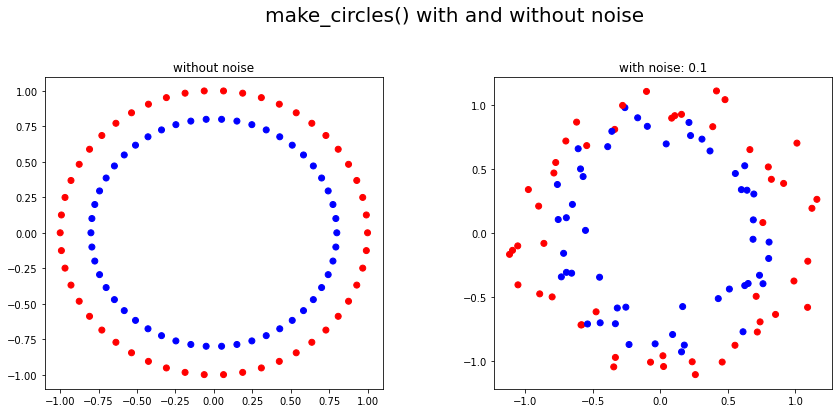

In [162]:
seed = 11
rand_state = 11

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
plt_ind_list = np.arange(3)+131

for noise,plt_ind in zip([0, 0.1],plt_ind_list):
    x, label = datasets.make_circles(noise=noise,random_state=rand_state)
    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    if noise:
        plt.title('with noise: '+str(noise))
    else:
        plt.title('without noise')

plt.suptitle('make_circles() with and without noise',fontsize=20, ha='right')
fig.tight_layout(rect=[0, 0.03, 1, 0.95], w_pad=8)
plt.show()

Let's try different kernels and see if we can successfully separate the data

In [110]:
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 2) kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel'
          ]

In [175]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x, label)
poly_svc_2 = svm.SVC(kernel='poly', degree=2, C=C).fit(x, label)
poly_svc_3 = svm.SVC(kernel='poly', degree=3, C=C).fit(x, label)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x, label)

In [109]:
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

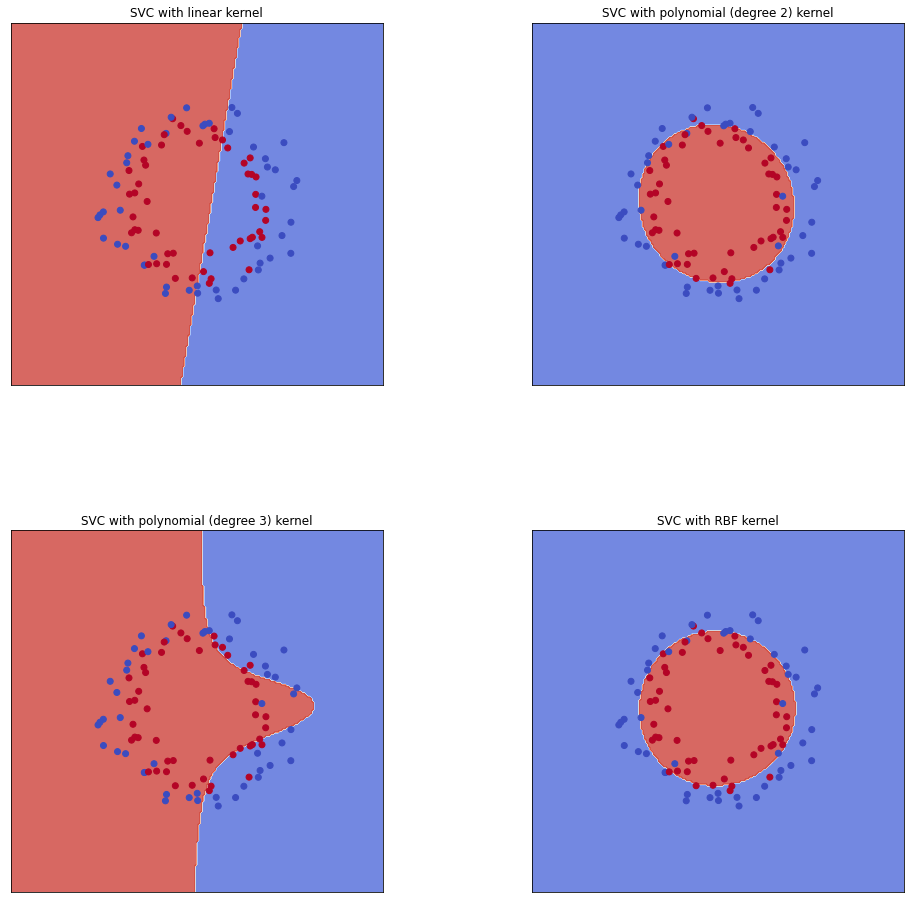

In [177]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(16,16))
for i, clf in enumerate((svc, poly_svc_2, poly_svc_3, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=label, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Can you guess why the SVC with polynomial of degree two is working but not with polynomial of degree three?

Let's see what happens when we use the feature map $(x,y) \to (x^2, y^2)$:

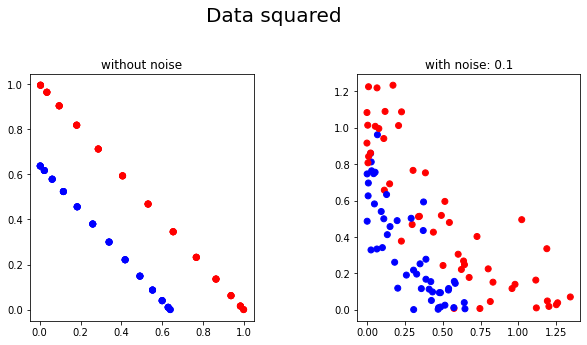

In [174]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for noise,plt_ind in zip([0, 0.1],plt_ind_list):
    x, label = datasets.make_circles(noise=noise,random_state=rand_state)
    plt.subplot(plt_ind)    
    my_scatter_plot = plt.scatter(np.square(x[:,0]),
                                  np.square(x[:,1]),
                                  c=label,
                                  vmin=min(label),
                                  vmax=max(label),
                                  cmap=color_map_discrete)
    if noise:
        plt.title('with noise: '+str(noise))
    else:
        plt.title('without noise')
    
plt.suptitle('Data squared',fontsize=20, ha='right')
fig.tight_layout(rect=[0.2, 0.03, 1, 0.95], w_pad=8)
plt.show()

As you can clearly see here the data is separable if we map $(x,y) \to (x^2, y^2)$